In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.random.seed(666)

physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import os, shutil 

original_dataset_dir= 'D:/Documents/Grad-CAM/HCP_SYS866_2020/'

base_dir='D:/Documents/Grad-CAM/cerveaux/'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
train_dir=os.path.join(base_dir,'train/')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
validation_dir=os.path.join(base_dir,'validation/')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir=os.path.join(base_dir,'test/')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [4]:
train_homme_dir=os.path.join(train_dir,'homme')
if not os.path.exists(train_homme_dir):
    os.mkdir(train_homme_dir)

train_femme_dir = os.path.join(train_dir, 'femme')
if not os.path.exists(train_femme_dir):
    os.mkdir(train_femme_dir)
    
validation_homme_dir=os.path.join(validation_dir,'homme')
if not os.path.exists(validation_homme_dir):
    os.mkdir(validation_homme_dir)

validation_femme_dir = os.path.join(validation_dir, 'femme')
if not os.path.exists(validation_femme_dir):
    os.mkdir(validation_femme_dir)
    
test_homme_dir=os.path.join(test_dir,'homme')
if not os.path.exists(test_homme_dir):
    os.mkdir(test_homme_dir)

test_femme_dir = os.path.join(test_dir, 'femme')
if not os.path.exists(test_femme_dir):
    os.mkdir(test_femme_dir)

In [5]:
file= open('D:/Documents/Grad-CAM/labels.csv','r')

ligne= file.readlines()

file.close()

In [6]:
nom=[]
sexe=[]


for i in range (2,len(ligne)):
    
    li=str(ligne[i]).rstrip('\n')
    liste=li.split(',')
    nom.append(liste[0])
    sexe.append(liste[8])
    
print(len(nom))
print(len(sexe))

1205
1205


In [7]:
# Ajout d'images au dossier d'entrainement
for i in range(0, 1000):
    fname='img'+nom[i]+'_T1w.png'
    src= os.path.join(original_dataset_dir, fname)
    if os.path.isfile(src)==True:
        if sexe[i]=='1':
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(train_homme_dir, fname)
            shutil.copyfile(src, dst)
        else:
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(train_femme_dir, fname)
            shutil.copyfile(src, dst)

In [8]:
# Ajout d'images au dossier de validation
for i in range(1000, 1100):
    fname='img'+nom[i]+'_T1w.png'
    src= os.path.join(original_dataset_dir, fname)
    if os.path.isfile(src)==True:
        if sexe[i]=='1':
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(validation_homme_dir, fname)
            shutil.copyfile(src, dst)
        else:
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(validation_femme_dir, fname)
            shutil.copyfile(src, dst)

In [9]:
# Ajout d'images au dossier de test
for i in range(1100, 1205):
    fname='img'+nom[i]+'_T1w.png'
    src= os.path.join(original_dataset_dir, fname)
    if os.path.isfile(src)==True:
        if sexe[i]=='1':
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(test_homme_dir, fname)
            shutil.copyfile(src, dst)
        else:
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(test_femme_dir, fname)
            shutil.copyfile(src, dst)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.10,
        brightness_range=[0.5,1.5],
        #horizontal_flip=True,
        rotation_range=5)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
image_size = (150, 150)
batch_size = 32

training_set = train_datagen.flow_from_directory(
    "cerveaux/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 837 images belonging to 2 classes.


In [13]:
validation_set = validation_datagen.flow_from_directory(
    "cerveaux/validation",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 88 images belonging to 2 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    "cerveaux/test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 84 images belonging to 2 classes.


## Définition du modèle

In [31]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [33]:
epochs = 10

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=METRICS)

history = model.fit(x = training_set, validation_data=validation_set, shuffle=True, epochs=epochs)

Epoch 1/10
27/27 [==============================] - 24s 891ms/step - loss: 0.5744 - tp: 335.0000 - fp: 127.0000 - tn: 255.0000 - fn: 120.0000 - accuracy: 0.7049 - precision: 0.7251 - recall: 0.7363 - auc: 0.7689 - val_loss: 0.4387 - val_tp: 43.0000 - val_fp: 10.0000 - val_tn: 31.0000 - val_fn: 4.0000 - val_accuracy: 0.8409 - val_precision: 0.8113 - val_recall: 0.9149 - val_auc: 0.9037
Epoch 2/10
27/27 [==============================] - 23s 857ms/step - loss: 0.4604 - tp: 368.0000 - fp: 89.0000 - tn: 293.0000 - fn: 87.0000 - accuracy: 0.7897 - precision: 0.8053 - recall: 0.8088 - auc: 0.8632 - val_loss: 0.3780 - val_tp: 44.0000 - val_fp: 8.0000 - val_tn: 33.0000 - val_fn: 3.0000 - val_accuracy: 0.8750 - val_precision: 0.8462 - val_recall: 0.9362 - val_auc: 0.9245
Epoch 3/10
27/27 [==============================] - 23s 841ms/step - loss: 0.3517 - tp: 402.0000 - fp: 67.0000 - tn: 315.0000 - fn: 53.0000 - accuracy: 0.8566 - precision: 0.8571 - recall: 0.8835 - auc: 0.9245 - val_loss: 0.334

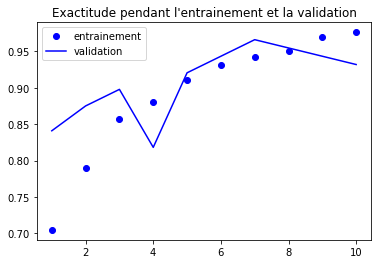

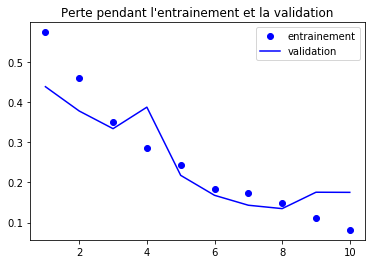

In [34]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='entrainement')
plt.plot(epochs, val_acc,'b', label='validation')
plt.title('Exactitude pendant l\'entrainement et la validation')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='entrainement')
plt.plot(epochs, val_loss, 'b', label='validation')
plt.title('Perte pendant l\'entrainement et la validation')
plt.legend()
plt.show()

In [35]:
test_loss, test_tp, test_fp, test_tn, test_fn, test_acc, test_prec, test_recall, test_auc = model.evaluate(test_set)

3/3 [==============================] - 1s 367ms/step - loss: 0.0552 - tp: 38.0000 - fp: 1.0000 - tn: 44.0000 - fn: 1.0000 - accuracy: 0.9762 - precision: 0.9744 - recall: 0.9744 - auc: 0.9983           


In [36]:
print(test_loss, test_tp, test_fp, test_tn, test_fn, test_acc, test_prec, test_recall, test_auc)

0.055195312947034836 38.0 1.0 44.0 1.0 0.976190447807312 0.9743589758872986 0.9743589758872986 0.9982905983924866


In [37]:
from keras.preprocessing import image

test_image = image.load_img('./cerveaux/test/homme/img920655_T1w.png', target_size = (150, 150))
test_image = image.img_to_array(test_image)/255.
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict_on_batch(test_image)
print(prediction)

[[0.93877184]]


In [38]:
y_true_labels = test_set.classes
true_labels = []

for label in y_true_labels:
    true_labels.append(np.array([np.float32(label)]))

In [39]:
preds = model.predict(test_set)

In [40]:
from sklearn.metrics import roc_curve, auc

In [41]:
fpr, tpr, _ = roc_curve(true_labels, preds.tolist())
auc = auc(fpr, tpr)

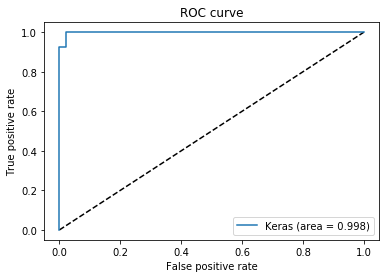

In [42]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Sauvegarde du modèle

In [43]:
model.save('D:/Documents/Grad-CAM/models/4_couches_adam_97_62_binary')

INFO:tensorflow:Assets written to: D:/Documents/Grad-CAM/models/4_couches_adam_97_34_binary\assets


### Pour juste loader le modèle

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('D:/Documents/Grad-CAM/models/4_couches_adam_98_07_categorical')

# Grad-CAM

#### https://gist.github.com/RaphaelMeudec/e9a805fa82880876f8d89766f0690b54

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
#IMAGE_PATH = './cerveaux/test/homme/img829294_T1w.png'
#IMAGE_PATH = './cerveaux/test/homme/img826881_T1w.png'
IMAGE_PATH = './cerveaux/test/femme/img824760_T1w.png'
#IMAGE_PATH = './cerveaux/test/homme/img829294_T1w.png'
#IMAGE_PATH = './cerveaux/test/homme/img829294_T1w.png'
#IMAGE_PATH = './cerveaux/test/homme/img829294_T1w.png'
#IMAGE_PATH = './cerveaux/test/homme/img829294_T1w.png'
#IMAGE_PATH = './cerveaux/test/homme/img829294_T1w.png'
LAYER_NAME = 'conv2d_10'
HOMME_CLASS_INDEX = 1
FEMME_CLASS_INDEX = 0

img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(150, 150))
img = tf.keras.preprocessing.image.img_to_array(img)/255.

model = keras.models.load_model('D:/Documents/Grad-CAM/models/4_couches_adam_98_07_categorical')

grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(LAYER_NAME).output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:, HOMME_CLASS_INDEX]

output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (150, 150))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)

cv2.imwrite('cam.png', output_image)

In [ ]:
predictions.numpy()

In [ ]:
model.summary()